# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [41]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:
temp = pd.read_csv('../your-code/Temp_States.csv')

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Print `temp`

In [4]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [9]:
temp.dtypes


City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [16]:
temp_newyork = temp[temp['State']=='New York']
temp_newyork

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [17]:
avg_newyork = temp_newyork.groupby('State').mean('Temperature')
avg_newyork


,Temperature
State,
New York,10.740741


#### We want to know cities and states with Temperature above 15 degress Celcius

In [19]:
over_15_deg = temp[temp['Temperature']>15]
over_15_deg


,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [30]:
cities_over_15 = temp.loc[temp['Temperature']>15,'City']
cities_over_15

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [36]:
cities_between_15_20= temp.loc[(temp['Temperature']>15) & (temp['Temperature']<20),'City']
cities_between_15_20

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [38]:
state_stats = temp.groupby('State')['Temperature'].agg(['mean', 'std'])
state_stats

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [45]:
employee = pd.read_csv('../your-code/Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [40]:
employee.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

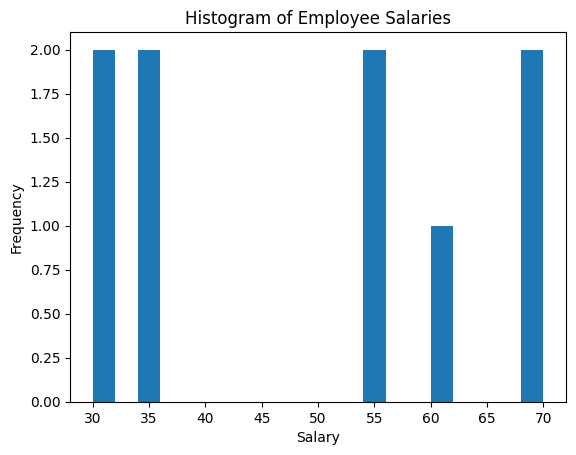

In [42]:
plt.hist(employee['Salary'], bins=20)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Employee Salaries')
plt.show()

#### What's the average salary in this company?

In [44]:
average_salary = np.mean(employee['Salary'])
average_salary

48.888888888888886

#### What's the highest salary?

In [47]:
max_salary = np.max(employee['Salary'])
max_salary

70

#### What's the lowest salary?

In [48]:
min_salary = np.min(employee['Salary'])
min_salary

30

#### Who are the employees with the lowest salary?

In [53]:
less_payed = employee.loc[employee['Salary']==min_salary,'Name']
less_payed

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [59]:
david = employee.loc[employee['Name']=='David']
david


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [61]:
david_salary = employee.loc[employee['Name']=='David','Salary']
david_salary

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [63]:
associates = employee.loc[employee['Title']=='associate']
print(associates)

     Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [67]:
first_3 = employee[:3]
print(first_3)


    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


In [68]:
first_3_iloc = employee.iloc[:3]
print(first_3_iloc)


    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### Find the employees who's title is associate and the salary above 55?

In [70]:
associates_above_56 = employee.loc[(employee['Title']=='associate')&(employee['Salary']>56)]
print( associates_above_56)


    Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [73]:
groupby_years = employee.groupby('Years').mean('Salary')
groupby_years

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [75]:
groupby_title = employee.groupby('Title').mean()
groupby_title

,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

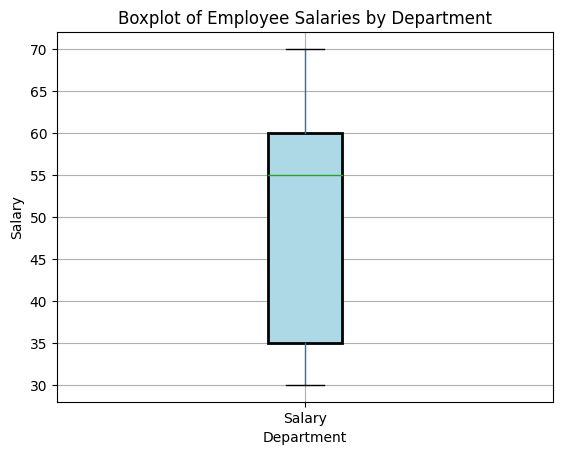

In [83]:
boxprops = dict(linestyle='-', linewidth=2, color='black', facecolor='lightblue')
salary = employee.boxplot(column='Salary',boxprops=boxprops,patch_artist=True)
plt.xlabel('Department')
plt.ylabel('Salary')
plt.title('Boxplot of Employee Salaries by Department')
plt.suptitle('')
plt.show()

In [86]:
first_quartile = np.percentile(employee['Salary'],25)
print(f'First quartile : ',first_quartile)

First quartile :  35.0


In [87]:
third_quartile = np.percentile(employee['Salary'],75)
print(f'Third quartile : ',third_quartile)

Third quartile :  60.0


#### Is the mean salary per gender different?

In [88]:
gender_mean = employee.groupby('Gender').mean()
print(gender_mean)

        Years  Salary
Gender               
F         4.0    47.5
M         4.2    50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [92]:
def basic_statistics (x):
    mean = np.mean(x)
    max = np.max(x)
    min = np.min(x)
    return str(f'Mean:{mean}. Max:{max}. Min: {min}')
Salary_info = basic_statistics(employee['Salary'])
Years_info = basic_statistics(employee['Years'])
print (f'Info for Salary:{Salary_info}')
print (f'Info for Years: {Years_info}')


Info for Salary:Mean:48.888888888888886. Max:70. Min: 30
Info for Years: Mean:4.111111111111111. Max:8. Min: 1


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [93]:
diff = employee.groupby('Department')['Salary'].apply(lambda x: x.max() - x.min())
diff

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [94]:
orders = pd.read_csv('../your-code/Orders.csv')
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [100]:
print(orders.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB
None


In [99]:
print(orders.describe())

          Unnamed: 0      InvoiceNo           year          month  \
count  397924.000000  397924.000000  397924.000000  397924.000000   
mean   278465.221859  560617.126645    2010.934259       7.612537   
std    152771.368303   13106.167695       0.247829       3.416527   
min         0.000000  536365.000000    2010.000000       1.000000   
25%    148333.750000  549234.000000    2011.000000       5.000000   
50%    284907.500000  561893.000000    2011.000000       8.000000   
75%    410079.250000  572090.000000    2011.000000      11.000000   
max    541908.000000  581587.000000    2011.000000      12.000000   

                 day           hour       Quantity      UnitPrice  \
count  397924.000000  397924.000000  397924.000000  397924.000000   
mean        3.614555      12.728247      13.021823       3.116174   
std         1.928274       2.273535     180.420210      22.096788   
min         1.000000       6.000000       1.000000       0.000000   
25%         2.000000      11.0000

####  What is the average Purchase Price?

#### What were the highest and lowest purchase prices? 

In [102]:
price_info = basic_statistics(orders['UnitPrice'])
print ( f'Basic info for Purchase Price: {price_info}')

Basic info for Purchase Price: Mean:3.116174480549152. Max:8142.75. Min: 0.0


#### Select all the customers we have in Spain

In [130]:
customers_spain = orders[orders['Country']=='Spain']
customers_spain.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [107]:
number_customers = customers_spain.count(axis=0)
number_customers

Unnamed: 0      2485
InvoiceNo       2485
StockCode       2485
year            2485
month           2485
day             2485
hour            2485
Description     2485
Quantity        2485
InvoiceDate     2485
UnitPrice       2485
CustomerID      2485
Country         2485
amount_spent    2485
dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [129]:
more_than_50 = orders[orders['Quantity']>50]
more_than_50.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00


#### Select orders from Spain that are above 50 items

In [125]:
spain_more_50 = orders.loc[(orders['Quantity']>50)&(orders['Country']=='Spain')]
spain_more_50.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [126]:
free_orders = orders[orders['UnitPrice']==0]
free_orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [127]:
lunch_bag = orders[orders['Description'].str.contains('lunch bag')]
lunch_bag.head()


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [128]:
lunch_bag_2011 = orders[(orders['Description'].str.contains('lunch bag'))&(orders['year']==2011)]
lunch_bag_2011.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

Text(0.5, 1.0, 'Histogram of Age Distribution')

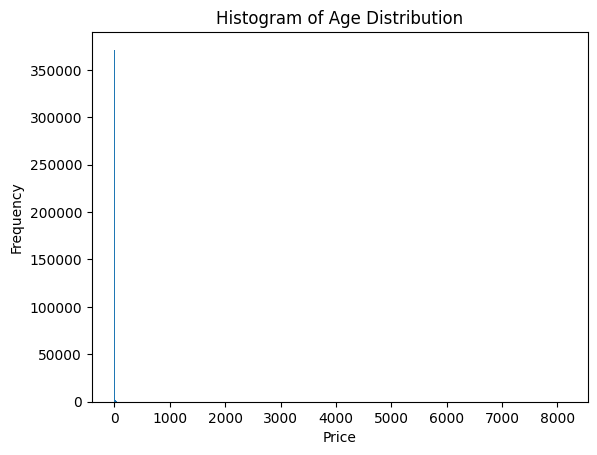

In [135]:
plt.hist(orders['UnitPrice'], bins=1000)

# add axis labels and a title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution')

#### Select all orders made in the month of August

In [136]:
auguts_orders = orders[orders['month']==7]
auguts_orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
172648,245903,558638,84836,2011,7,5,8,zinc metal heart decoration,12,2011-07-01 08:16:00,1.25,16317,United Kingdom,15.00
172649,245904,558638,71459,2011,7,5,8,hanging jam jar t-light holder,24,2011-07-01 08:16:00,0.85,16317,United Kingdom,20.40
172650,245905,558638,22784,2011,7,5,8,lantern cream gazebo,3,2011-07-01 08:16:00,4.95,16317,United Kingdom,14.85
172651,245906,558638,23145,2011,7,5,8,zinc t-light holder star large,12,2011-07-01 08:16:00,0.95,16317,United Kingdom,11.40
172652,245907,558638,22674,2011,7,5,8,french toilet sign blue metal,12,2011-07-01 08:16:00,1.25,16317,United Kingdom,15.00


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [142]:
auguts_orders['Country'].value_counts()


United Kingdom        23599
Germany                 755
EIRE                    616
France                  448
Spain                   180
Australia               159
Unspecified             149
Belgium                 128
Switzerland             126
Portugal                 89
Finland                  83
Canada                   78
Singapore                75
Austria                  55
Sweden                   54
Norway                   49
Japan                    39
Poland                   32
European Community       29
Israel                   27
Greece                   24
Denmark                  17
Netherlands              10
Italy                     6
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [140]:
avg_spent_country = orders.groupby('Country')['amount_spent'].mean()
avg_spent_country.head()

Country
Australia    116.895620
Austria       25.624824
Bahrain       32.258824
Belgium       20.283772
Brazil        35.737500
Name: amount_spent, dtype: float64

#### What's the most expensive item?

In [144]:
max_price = np.max(orders['UnitPrice'])
most_expensive = orders[orders['UnitPrice']==max_price]
most_expensive

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [145]:
avg_spent_year = orders.groupby('year')['amount_spent'].mean()
avg_spent_year

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64